# sparse_lap execution time based on whs and image_size

Goal is to visualise how long specific parts of the `sparse_lap` function take based on image size and window half size.

In [1]:
using LAP_julia, TimerOutputs, DataFrames, TableView, JLD2, FileIO, PyPlot

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16997091942973010440\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10359717186642782124\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16997091942973010440\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3407330123296859998\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2683738750790961792\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3407330123296859998\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## gather data

In [3]:
# prepare new dataframe
sp_lap_win_sum = DataFrame(
    index = Int[],
    reg_fun = Symbol[],
    img_size = Int[],
    whs = Int[],
    timer = TimerOutput[],
    results = Dict{String,Float64}[]
    #Benchmark = BenchmarkTools.Trial[],
    #flow = Matrix[],
    #flow_est = Matrix[]
    )

window_half_sizes = cat(collect(1:51), collect(61:10:101), collect(141:40:381), dims=1);
img_sizes = [50, 100, 200, 400, 800, 1600];

In [6]:
# params:
# call function `repeat_count` more times for small `whs < `repeat_thresh`
repeat_thresh = 55
repeat_count = 4

# fill dataframe
df = sp_lap_win_sum
let index = 0
    for img_size in img_sizes
        img, imgw, flow = gen_init(:chess, chess_args=[25, img_size/25])

        # limit the max window half size to 1/4 the image
        whs_limit = img_size/4
        whs_modified = filter(x -> x <= whs_limit, window_half_sizes)

        for whs in whs_modified
            for reg_fun in [sparse_lap]
                window = [whs * 2 + 1, whs * 2 + 1]
                # window sum 1
                timer = TimerOutput("reg alg: sp lap")
                flow_est, source_reg, timer, results = test_registration_alg(reg_fun, img, imgw, flow, [whs, window], Dict(:timer => timer), timer=timer, display=false)

                # repeat with the same timer
                if whs <= repeat_thresh
                    for _ in 1:repeat_count
                        flow_est, source_reg, timer, results = test_registration_alg(reg_fun, img, imgw, flow, [whs, window], Dict(:timer => timer), timer=timer, display=false)
                    end
                end

                index = index + 1
                println("at index: ", index, " img_size:", img_size, " whs: ", whs)
                push!(df, Dict(:index => index,
                               :reg_fun => Symbol(reg_fun),
                               :img_size => img_size,
                               :whs => whs,
                               :timer => timer,
                               :results => results))
            end
        end
    end
end
                
# @save "sp_lap_win_sum_df.jld2" df

at index: 1 img_size:50 whs: 1
at index: 2 img_size:50 whs: 2
at index: 3 img_size:50 whs: 3
at index: 4 img_size:50 whs: 4
at index: 5 img_size:50 whs: 5
at index: 6 img_size:50 whs: 6
at index: 7 img_size:50 whs: 7
at index: 8 img_size:50 whs: 8
at index: 9 img_size:50 whs: 9
at index: 10 img_size:50 whs: 10
at index: 11 img_size:50 whs: 11
at index: 12 img_size:50 whs: 12
at index: 13 img_size:100 whs: 1
at index: 14 img_size:100 whs: 2
at index: 15 img_size:100 whs: 3
at index: 16 img_size:100 whs: 4
at index: 17 img_size:100 whs: 5
at index: 18 img_size:100 whs: 6
at index: 19 img_size:100 whs: 7
at index: 20 img_size:100 whs: 8
at index: 21 img_size:100 whs: 9
at index: 22 img_size:100 whs: 10
at index: 23 img_size:100 whs: 11
at index: 24 img_size:100 whs: 12
at index: 25 img_size:100 whs: 13
at index: 26 img_size:100 whs: 14
at index: 27 img_size:100 whs: 15
at index: 28 img_size:100 whs: 16
at index: 29 img_size:100 whs: 17
at index: 30 img_size:100 whs: 18
at index: 31 img_si

at index: 239 img_size:1600 whs: 39
at index: 240 img_size:1600 whs: 40
at index: 241 img_size:1600 whs: 41
at index: 242 img_size:1600 whs: 42
at index: 243 img_size:1600 whs: 43
at index: 244 img_size:1600 whs: 44
at index: 245 img_size:1600 whs: 45
at index: 246 img_size:1600 whs: 46
at index: 247 img_size:1600 whs: 47
at index: 248 img_size:1600 whs: 48
at index: 249 img_size:1600 whs: 49
at index: 250 img_size:1600 whs: 50
at index: 251 img_size:1600 whs: 51
at index: 252 img_size:1600 whs: 61
at index: 253 img_size:1600 whs: 71
at index: 254 img_size:1600 whs: 81
at index: 255 img_size:1600 whs: 91
at index: 256 img_size:1600 whs: 101
at index: 257 img_size:1600 whs: 141
at index: 258 img_size:1600 whs: 181
at index: 259 img_size:1600 whs: 221
at index: 260 img_size:1600 whs: 261
at index: 261 img_size:1600 whs: 301
at index: 262 img_size:1600 whs: 341
at index: 263 img_size:1600 whs: 381


## Visualise results

Choose a specific `sections` directory of the timer variable to see how long it takes compute.

This is how the section directory looks:
```
 ──────────────────────────────────────────────────────────────────────────────────
 reg alg: sp lap                1    4.76s   100%   4.76s    151MiB  100%    151MiB
   sparse lap                   1   10.2ms  0.21%  10.2ms   1.29MiB  0.86%  1.29MiB
     filtering                  1    612μs  0.01%   612μs    432KiB  0.28%   432KiB
     prepare A and b            1    244μs  0.01%   244μs    236KiB  0.15%   236KiB
       window sum part 1        3    148μs  0.00%  49.5μs    141KiB  0.09%  46.8KiB
       window sum part 2        2   80.0μs  0.00%  40.0μs   93.4KiB  0.06%  46.7KiB
     multi mat div              1    116μs  0.00%   116μs    210KiB  0.14%   210KiB
     calculate flow             1   1.39μs  0.00%  1.39μs      480B  0.00%     480B
   find edge points             1   1.53ms  0.03%  1.53ms    277KiB  0.18%   277KiB
   interpolate flow             1   1.19ms  0.02%  1.19ms    133KiB  0.09%   133KiB
   generate source_reg          1    991μs  0.02%   991μs    235KiB  0.15%   235KiB
 ──────────────────────────────────────────────────────────────────────────────────
```

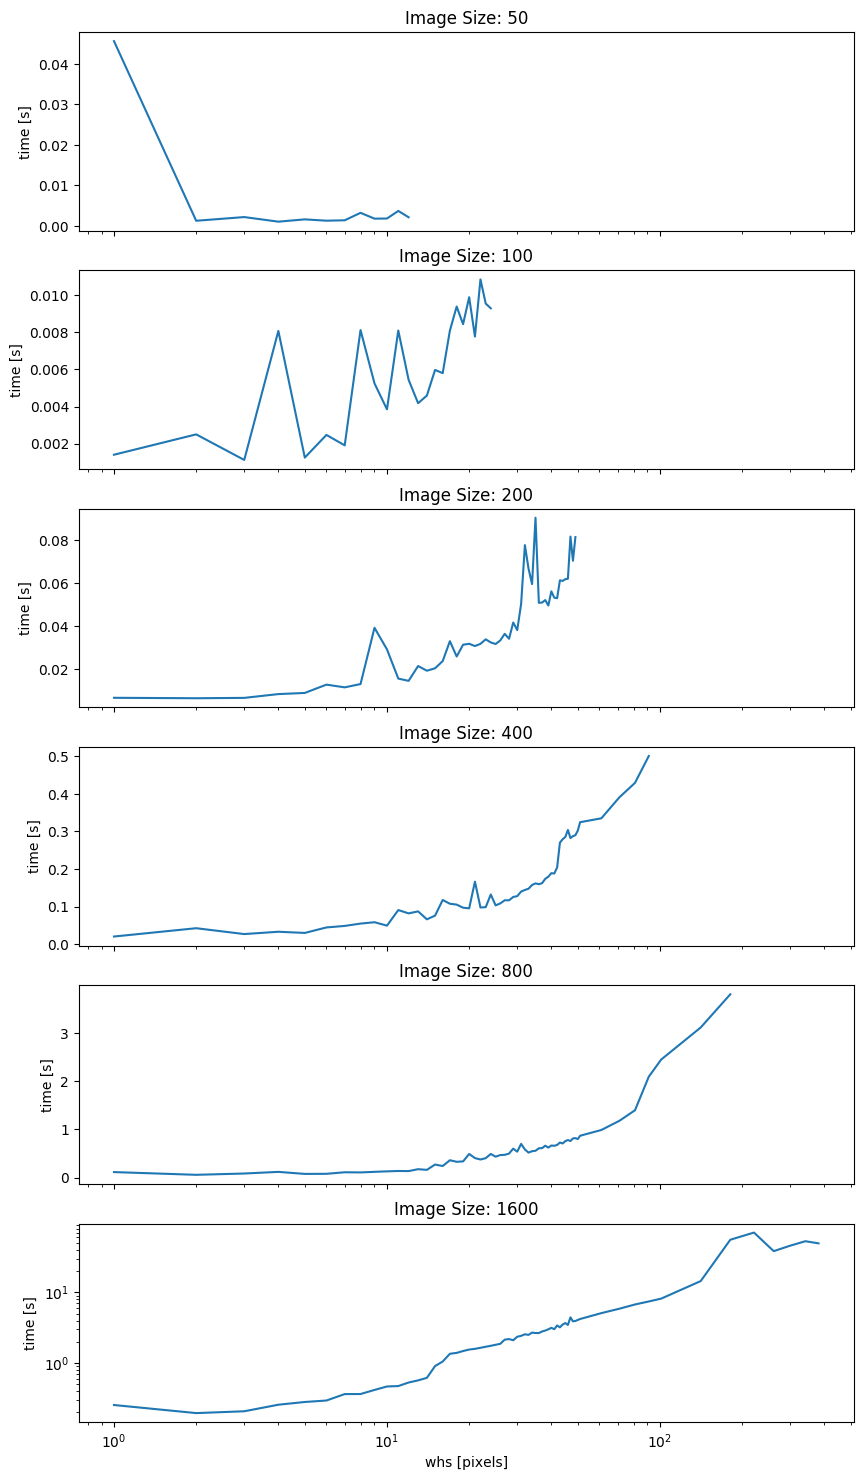

In [11]:
sections = ["reg alg: sp lap", "sparse lap", "filtering"]

fig, axs = subplots(6, sharex=true, figsize=(10,10))
for (img_size, ax) in zip(img_sizes, axs)
    ax.set_title("Image Size: " * string(img_size))

    n = count(k -> k < (img_size/4), window_half_sizes)
    timers3 = df[(df.reg_fun .== :sparse_lap) .& (df.img_size .== img_size), :][:, :timer][1:n]

    y3 = map(x -> get_avg_time(get_timer(x, sections)), timers3)
    x = filter(x -> x < (img_size/4), window_half_sizes)[1:n]

    xscale("log")
    yscale("log")
    subplots_adjust(top=1.5)
    ax.plot(x, y3)
    xlabel("whs [pixels]")
    ax.set_ylabel("time [s]")
end

## helper functions

In [8]:
# get the timer[sections[1]][sections[2]]... and print errors, if errored return blank timer.
function get_timer(timer, sections)
    private_sections = copy(sections)
    try
        timer[private_sections[1]]
    catch e
        println(e)
        return TimerOutput()
    end
    out = timer
    while private_sections != []
        out = out[popfirst!(private_sections)]
    end
    return out
end

# get the avg time in seconds for the section in timer
function get_avg_time(timer)
    return (TimerOutputs.time(timer)/TimerOutputs.ncalls(timer))/10e8
end


get_avg_time (generic function with 1 method)